# Observaciones Errores Clave


- Rango de edades tiene algunos errores que fueron dejados como nulos
- Saldo total error de rango
- Maximo dias mora error de rango
- Saldo productos activos y pasivos tienen errores
- Cantidad productos activos y pasivos tienen errores (possiblemente solo por valores negativos)
- Saldo en competencia error de rango
- Monto credito error de rango

# Tratamiento de errores

## Rango de edades

- Reemplazar valores por encima de 100 con nulos

## Saldo productos activos

- Encontrar un threshold máximo, a partir de ese threshold convertir en nulo

## Saldo productos pasivos

- Encontrar un threshold máximo, a partir de ese threshold convertir en nulo

## Saldo total

- Crear de nuevo la columna, sumando saldo de productos activos y pasivos

## Cantidad de productos activos/pasivos

- Encontrar un threshold máximo, a partir de ese threshold convertir en nulo

## Saldo

- Encontrar un threshold máximo, a partir de ese threshold convertir en nulo

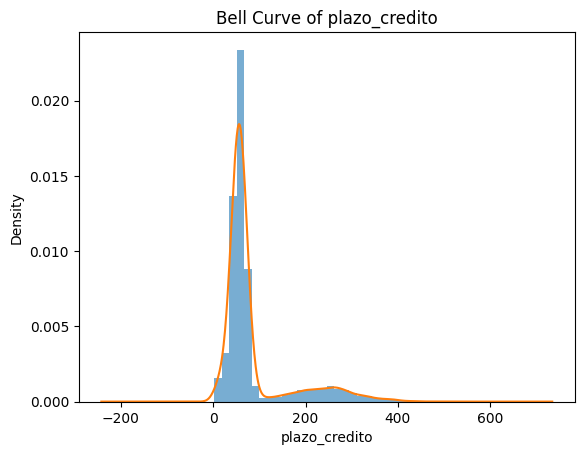

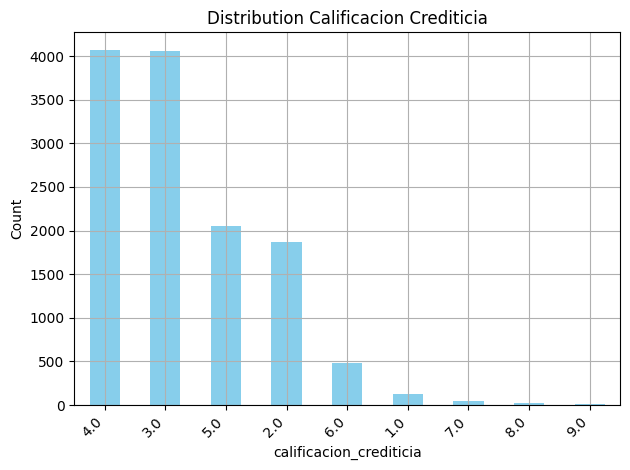

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats.mstats import winsorize
import numpy as np
pd.set_option('display.float_format', '{:.2f}'.format)

def numerical_distribution_graph(table, column):
    ax = table[column].plot.hist(
        bins=30,
        density=True,
        alpha=0.6,
        )
    table[column].plot.kde(
        ax=ax,
        bw_method='scott',
        ind=1000,
        )
    ax.set_title(f'Bell Curve of {column}') 
    ax.set_xlabel(column)
    ax.set_ylabel('Density')


    plt.show()

numerical_distribution_graph(df, "plazo_credito")

def categorical_distribution_graph(table, column, kind='bar', order=None, title=None):
    # Compute category counts
    counts = table[column].value_counts(dropna=False)

    # Optionally reorder categories
    if order is not None:
        counts = counts.reindex(order)

    # Plot the counts as bars or a pie
    ax = counts.plot(kind=kind, color='skyblue', grid=True)
    ax.set_title(title or f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

categorical_distribution_graph(df, "calificacion_crediticia", title="Distribution Calificacion Crediticia")

In [86]:
data_path = Path().cwd() / "data" / "df_train.csv"
df = pd.read_csv(data_path)

def clean_data(df):
    df['edad'] = df['edad'].where(df['edad'] <= 100, np.nan)
    df["saldo_productos_activos"] = df["saldo_productos_activos"].where(df["saldo_productos_activos"] >= 1000.00, np.nan)
    df["saldo_productos_pasivos"] = df["saldo_productos_pasivos"].where(df["saldo_productos_pasivos"] <= 47995816.00, np.nan)
    df["cantidad_productos_activos"] = df["cantidad_productos_activos"].where(df["cantidad_productos_activos"] <= 15, np.nan)
    df["cantidad_productos_pasivos"] = df["cantidad_productos_pasivos"].where(df["cantidad_productos_pasivos"] <= 15, np.nan)
    return df

df_cleansed = clean_data(df)


In [87]:
df_cleansed.describe()

,id,edad,ingreso_reportado,maximo_dias_mora,saldo_total,saldo_productos_activos,saldo_productos_pasivos,cantidad_productos_activos,cantidad_productos_pasivos,saldo_en_competencia,monto_credito,plazo_credito,calificacion_crediticia,tasa_interes
count,12747.00,12738.00,10468.00,12747.00,12747.00,12720.00,12746.00,12740.00,12745.00,10848.00,12747.00,12747.00,12747.00,12747.00
mean,547998.23,44.66,93186.62,26.51,842255.98,644558.39,187007.72,2.88,1.69,722596.17,407387.15,84.59,3.62,12.61
std,258746.18,10.81,56674.28,63.95,2317012.47,1225680.78,1309655.58,1.39,1.35,2201297.60,1913235.81,75.49,1.12,4.34
min,100220.00,15.00,2301.00,0.00,591.00,1003.00,0.00,0.00,0.00,19.97,1000.00,2.00,1.00,3.19
25%,325867.50,37.00,56541.25,4.00,190432.00,141239.75,10030.25,2.00,1.00,131740.99,109000.00,48.00,3.00,8.23
50%,546497.00,44.00,86718.50,12.00,438913.00,360009.50,27535.42,3.00,1.00,369697.55,213000.00,59.00,4.00,12.98
75%,770526.50,51.00,106139.00,26.00,929906.00,803615.50,70524.00,4.00,2.00,810413.29,466000.00,72.00,4.00,15.84
max,999992.00,99.00,560021.00,2259.00,154055074.00,57169512.00,47263143.00,15.00,12.00,123638175.30,206877000.00,490.00,9.00,27.68


In [88]:
df.sort_values(by="saldo_en_competencia", ascending=True).head(20)
df.isna().any()

id                            False
categoria                     False
edad                           True
genero                        False
estado_civil                  False
ingreso_reportado              True
maximo_dias_mora              False
saldo_total                   False
saldo_productos_activos        True
saldo_productos_pasivos        True
cantidad_productos_activos     True
cantidad_productos_pasivos     True
saldo_en_competencia           True
monto_credito                 False
plazo_credito                 False
calificacion_crediticia       False
garantia_credito              False
tasa_interes                  False
dtype: bool

In [89]:
df.groupby("categoria")["saldo_productos_pasivos"].mean()

categoria
optima      29843.34
premier    138019.21
privada   2061490.35
Name: saldo_productos_pasivos, dtype: float64

In [90]:
df.describe()

,id,edad,ingreso_reportado,maximo_dias_mora,saldo_total,saldo_productos_activos,saldo_productos_pasivos,cantidad_productos_activos,cantidad_productos_pasivos,saldo_en_competencia,monto_credito,plazo_credito,calificacion_crediticia,tasa_interes
count,12747.00,12738.00,10468.00,12747.00,12747.00,12720.00,12746.00,12740.00,12745.00,10848.00,12747.00,12747.00,12747.00,12747.00
mean,547998.23,44.66,93186.62,26.51,842255.98,644558.39,187007.72,2.88,1.69,722596.17,407387.15,84.59,3.62,12.61
std,258746.18,10.81,56674.28,63.95,2317012.47,1225680.78,1309655.58,1.39,1.35,2201297.60,1913235.81,75.49,1.12,4.34
min,100220.00,15.00,2301.00,0.00,591.00,1003.00,0.00,0.00,0.00,19.97,1000.00,2.00,1.00,3.19
25%,325867.50,37.00,56541.25,4.00,190432.00,141239.75,10030.25,2.00,1.00,131740.99,109000.00,48.00,3.00,8.23
50%,546497.00,44.00,86718.50,12.00,438913.00,360009.50,27535.42,3.00,1.00,369697.55,213000.00,59.00,4.00,12.98
75%,770526.50,51.00,106139.00,26.00,929906.00,803615.50,70524.00,4.00,2.00,810413.29,466000.00,72.00,4.00,15.84
max,999992.00,99.00,560021.00,2259.00,154055074.00,57169512.00,47263143.00,15.00,12.00,123638175.30,206877000.00,490.00,9.00,27.68
